In [ ]:
# Libraries for all projects
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Prediciting Ice Cream Sales: Supervised Learning Example

In [ ]:
# Generate data
np.random.seed(42)
temperature = np.random.normal(30, 10, 100)
ice_cream_sales = 5 * temperature + np.random.normal(0, 20, 100)
print(temperature)
print(ice_cream_sales)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split    # useful for evaluating the performance of your model
X = temperature.reshape(-1, 1)                          # reshape for the features matrix
y = ice_cream_sales                                     # set target vector
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, 
                                                random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression   # 1. choose model class
model = LinearRegression()                          # 2. instantiate model
model.fit(Xtrain, ytrain)                           # 3. fit model to data
y_model = model.predict(Xtest)                      # 4. predict on new data

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_model)
r2 = r2_score(ytest, y_model)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

In [ ]:
plt.scatter(Xtest, ytest, color='black', label='Actual data')
plt.plot(Xtest, y_model, color='orange', linewidth=2, label='Regression line')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Ice Cream Sales')
plt.title('Temperature Effect on Ice Cream Sales')
plt.legend();

## Pokemon Classification

* *Purpose*: Make a model to predict whether a Pokemon is legnedary or not based on its attributes such as Attack, HP, Defense, etc.

In [ ]:
# Import data
poke_df = pd.read_csv("CSV\\pokemon.csv")
poke_df.head()

In [ ]:
# Define data
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation']
X = poke_df[features]  # features matrix
y = poke_df['Legendary']                                                      # target vector

In [ ]:
# Split data into training and tests sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, 
                                                random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier     # 1. choose model class
model = RandomForestClassifier()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                               # 3. fit model to data
ypred = model.predict(Xtest)                            # 4. predict on new data

In [ ]:
# Visualizing the decision tree
# Extract a single tree from RandomForest Classifier
tree_index = 0  # Indecx of the tree to visualize
single_tree = model.estimators_[tree_index]

# Plot the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(single_tree, feature_names=features, class_names=['Non-Legendary', 'Legendary'], filled=True)
plt.title('Decision Tree Classifier');

In [ ]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(ytest, ypred))

using confusion matrix display from scikit-learn

In [ ]:
# visualizing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ypred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix');


Using a seaborn heat map

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='Blues', cbar=True);
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

## Fruit Classification

In [ ]:
# Creating the dataset

data = {
     'Weight': [150, 160, 170, 130, 140, 135, 155, 120, 110, 145, 200, 210, 220, 215, 205],
    'Color': ['Red', 'Red', 'Red', 'Red', 'Red', 'Orange', 'Orange', 'Orange', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow'],
    'Size': ['Medium', 'Medium', 'Medium', 'Small', 'Small', 'Medium', 'Medium', 'Small', 'Small', 'Small', 'Large', 'Large', 'Large', 'Large', 'Large'],
    'Fruit': ['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Banana', 'Banana', 'Banana', 'Banana', 'Banana', 'Banana', 'Banana']
}

fruit_df = pd.DataFrame(data)
fruit_df

In [ ]:
# Encode the features
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
le_color = LabelEncoder()
le_size = LabelEncoder()
le_fruit = LabelEncoder()
fruit_df['Color'] = le_color.fit_transform(fruit_df['Color']) # transform labels to numerical labels
print(le_color.classes_) 
fruit_df['Size'] = le_size.fit_transform(fruit_df['Size'])
print(le_size.classes_)
fruit_df['Fruit'] = le_fruit.fit_transform(fruit_df['Fruit'])
print(le_fruit.classes_)


In [ ]:
# display new dataframe
fruit_df

In [ ]:
#print(le.inverse_transform(fruit_df['Color'])) # prints the wrong info because `LabelEncoder` remembers the last instance; need seperate encoders
#print(le.inverse_transform(fruit_df['Size']))
#print(le.inverse_transform(fruit_df['Fruit']))

In [ ]:
print(le_color.inverse_transform(fruit_df['Color']))
print(le_size.inverse_transform(fruit_df['Size']))
print(le_fruit.inverse_transform(fruit_df['Fruit']))

In [ ]:
# Define features matrix and target vector
X = fruit_df[['Weight', 'Color', 'Size']]
y = fruit_df['Fruit']

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier         # 1. choose model class
model = DecisionTreeClassifier()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                               # 3. fit model to data
ypred = model.predict(Xtest)                            # 4. predict on new data

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
# Visualizing
sns.pairplot(fruit_df, hue='Fruit', vars=['Weight', 'Color', 'Size']);

### Spam Email Classification

In [ ]:
# Sample data
data = {
    'label': ['ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham'],
    'message': [
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)',
        'U dun say so early hor... U c already then say...',
        'Nah I don’t think he goes to usf, he lives around here though',
        'FreeMsg Hey there darling it’s been 3 week’s now and no word back! I’d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv',
        'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
        'I HAVE A DATE ON SUNDAY WITH WILL!!',
        'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>>',
        'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010. T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
        'I‘ve been searching for the right words to thank you for this breather. I promise i won’t take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.'
    ]
}

df = pd.DataFrame(data)

In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['message'] = df['message'].str.replace(r'\W', ' ').str.lower()

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

In [ ]:
new_message = ["Hey JW! Thanks for reaching out to us"]
new_message_transformed = vectorizer.transform(new_message)
prediction = model.predict(new_message_transformed)
print('Prediction (0 = ham, 1 = spam):', prediction[0])

## Prediciting Animal Species from Images

### Load Dataset and Clean it up

In [102]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize


In [103]:
# Getting species names from folder names
dataset_path = 'CSV//a-10'
classes = os.listdir(dataset_path)
print(f'Classes: {classes}')
classes.remove('.DS_Store')
print(f'Classes: {classes}')

Classes: ['cat', 'butterfly', '.DS_Store', 'dog', 'chicken']
Classes: ['cat', 'butterfly', 'dog', 'chicken']


In [104]:
# Read Images and Labels into lists

images = []
labels = []

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name) # constructs full path to the image file
        img = imread(img_path)                       # reads the image file into a NumPy array using skimage
        
        # Ensure the image has 3 channels (RGB)
        if len(img.shape) == 2:  # grayscale image
            img = np.stack((img,)*3, axis=-1)
        elif img.shape[2] == 4:  # RGBA image
            img = img[:, :, :3]
            
        img_resized = resize(img, (64, 64))          # resizes the image to a fixed size for consistent input for ML model
        images.append(img_resized)                   # appends resized image to images list
        labels.append(class_name)                    # appends the class name (species) to the labels list

In [105]:
# convert lists to NumPy Arrays
X = np.array(images)                # features matrix
y = np.array(labels)                # target vector

In [106]:
print(f'Total images: {X.shape[0]}, Image shape: {X.shape[1:]}') # images should be 64x64; 3 represents color channels(red, green, blue)

Total images: 240, Image shape: (64, 64, 3)


### Preprocessing Images

* need dataset to be [n_samples, n_features]
* image is 3D: (height x width x channels)
* need to flatten image to convert it to a 1D array
* need to encode labels

In [107]:
Xflat = X.reshape(X.shape[0], -1)
Xflat.shape

(240, 12288)

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
yencoded = le.fit_transform(y)
print(yencoded)
print(le.inverse_transform(yencoded))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'butterfly' 'butterfly' 'butterfly' 'butterfly' 'butterfly' 'butterfly'
 'butterfly' 'butterfly' 'butterfly' 'butterfly' 'butterfly' 'butterfly'
 

In [109]:
# Split the data
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(Xflat, yencoded, test_size=0.3, random_state=42)

#### Validation Curve
Validation curve to determine relationship between accuracy and number of estimators for RandomForestClassifier

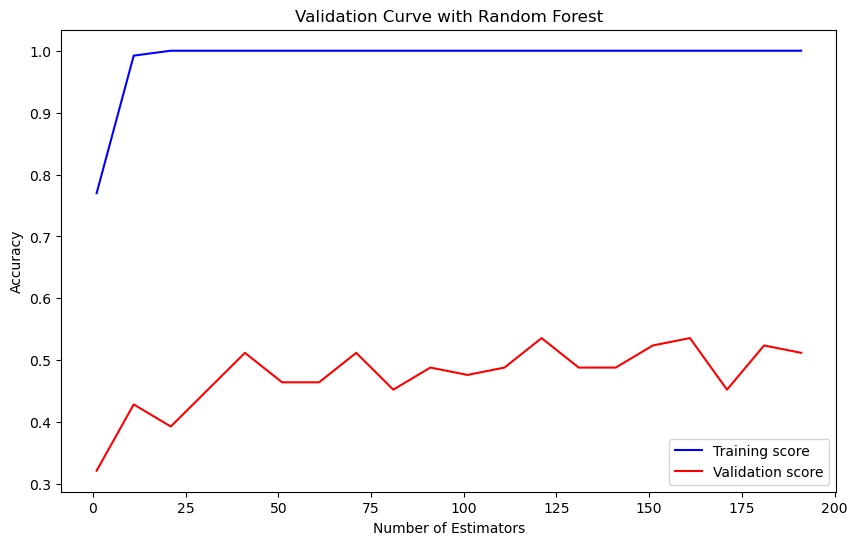

In [120]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 201, 10)
train_score, val_score = validation_curve(
    RandomForestClassifier(),
    Xtrain, ytrain,
    param_name='n_estimators',
    param_range=np.arange(1, 201, 10),
    cv=4,
    scoring='accuracy',
    n_jobs=1
)

train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)
val_std = np.std(val_score, axis=1)

plt.figure(figsize=(10,6))
#plt.plot(param_range, train_mean, label="Training score", color='b')
#plt.plot(param_range, val_mean, label="Cross-validation score", color='r')

#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="b", alpha=0.2)
#plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, color="r", alpha=0.2)

plt.plot(param_range, np.median(train_score, 1), label="Training score", color='b')
plt.plot(param_range, np.median(val_score, 1), label="Validation score", color='r')

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend(loc="best");

### Train model

In [131]:
from sklearn.tree import DecisionTreeClassifier         # 1. choose model class
model = DecisionTreeClassifier()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                               # 3. fit model to data
ypred = model.predict(Xtest)                            # 4. predict on new data

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=120)
model_rf.fit(Xtrain, ytrain)
ypred_rf = model_rf.predict(Xtest)

### Learning Curve

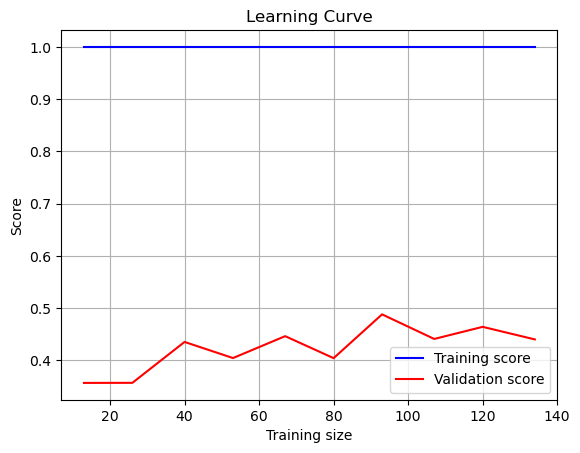

In [127]:
from sklearn.model_selection import learning_curve
train_size, train_score, val_score = learning_curve(
    RandomForestClassifier(),
    Xtrain, ytrain,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=1
)

plt.plot(train_size, np.mean(train_score, 1), color='blue', label="Training score")
plt.plot(train_size, np.mean(val_score, 1), color='red', label="Validation score")
plt.title('Learning Curve')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

From the above graph we see that by increasing the training data, the model does get better, but not significantly. Since there is no real convergence, it would be best to use a more complicated model 

### Hyperparamter Tuning

Using Grid Search to find optimal parameters for random forest classifier model

In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 75, 85, 100, 125, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
109 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py", line 6

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'splitter': 'random'}


/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py", line 666

### Evaluate the model accuracy

In [132]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred))
print(accuracy_score(ytest, ypred_rf))

0.4027777777777778
0.5277777777777778


### Visualizing some predictions

Decision Tree Predictions:


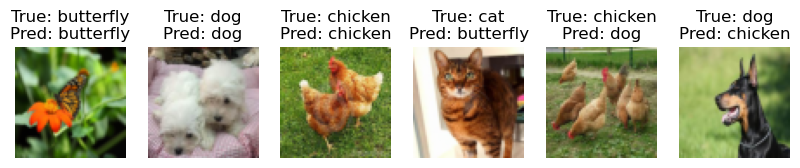

Random Forest Predictions:


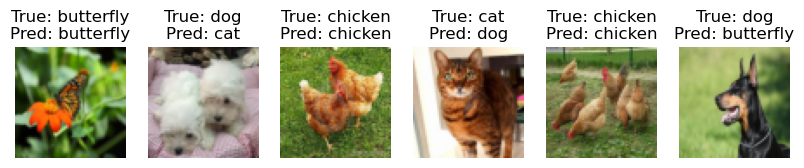

In [133]:

def plot_predictions(images, true_labels, pred_labels, label_encoder, num_images=6):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        true_label = label_encoder.inverse_transform([true_labels[i]])[0]
        pred_label = label_encoder.inverse_transform([pred_labels[i]])[0]
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')
    plt.show()

# Select a few images to visualize
indices = np.random.choice(len(Xtest), 6, replace=False)
images_to_plot = Xtest[indices].reshape(-1, 64, 64, 3)
true_labels = ytest[indices]
pred_labels_dt = ypred[indices]
pred_labels_rf = ypred_rf[indices]

print("Decision Tree Predictions:")
plot_predictions(images_to_plot, true_labels, pred_labels_dt, le)

print("Random Forest Predictions:")
plot_predictions(images_to_plot, true_labels, pred_labels_rf, le)


### HOG

In [ ]:
from skimage import data, color, feature
import skimage.data
img = imread("CSV//a-10//chicken//2.jpeg")
image = color.rgb2gray(img)
hog_vec, hog_vis = feature.hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

### Implementing HOG on Predicting Animal Species

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize


In [72]:
# Getting species names from folder names
dataset_path = 'CSV//animals-10//animals-10'
classes = os.listdir(dataset_path)
print(f'Classes: {classes}')

Classes: ['cat', 'butterfly', 'dog', 'sheep', 'spider', 'chicken', 'horse', 'squirrel', 'cow', 'elephant']


In [74]:
# Read Images and Labels into lists

images = []
labels = []

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name) # constructs full path to the image file
        img = imread(img_path)                       # reads the image file into a NumPy array using skimage
        if img.shape[2] == 4:  # RGBA image
            img = img[:, :, :3]  
        img_resized = resize(img, (64, 64))          # resizes the image to a fixed size for consistent input for ML model
        img_gray = color.rgb2gray(img_resized)
        images.append(img_resized)                   # appends resized image to images list
        labels.append(class_name)                    # appends the class name (species) to the labels list

IndexError: tuple index out of range

In [55]:
# convert lists to NumPy Arrays
X = np.array(images)                # features matrix
y = np.array(labels)                # target vector

### Implementing HOG for better accuracy score

In [56]:
# Extract HOG features from each image
hog_features = []
for image in X:
    features = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', channel_axis=-1)
    hog_features.append(features)

# Convert HOG features and labels to numpy arrays
X_hog = np.array(hog_features)
y_encoded = LabelEncoder().fit_transform(y)

In [57]:
# Convert HOG features and labels to numpy arrays
X_hog = np.array(hog_features)
y_encoded = LabelEncoder().fit_transform(y)


In [58]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hog, y_encoded, test_size=0.3, random_state=42)

Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

         cat       0.69      0.41      0.51        22
   butterfly       0.41      0.69      0.51        13
         dog       0.71      0.85      0.77        20
     chicken       0.54      0.41      0.47        17

    accuracy                           0.58        72
   macro avg       0.59      0.59      0.57        72
weighted avg       0.61      0.58      0.57        72



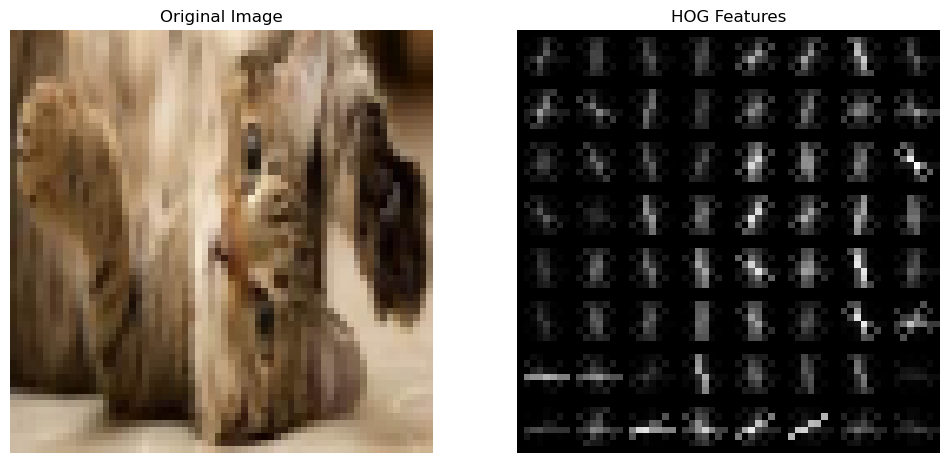

In [70]:
 # Train a Random Forest Classifier
from sklearn.metrics import accuracy_score, classification_report
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=classes))

# Plot an example of HOG features for visualization
image = X[0]
hog_image = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True, channel_axis=-1)[1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title('HOG Features')
plt.show()
